In [14]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from DataPreprocess import Preprocess

In [39]:
file = r"C:\Users\User\Desktop\Python\anomaly_detect\anomaly_detect_code\dcase2020_task2_baseline\dev_data\train\normal_id_00_00000003.wav"

In [30]:
file=r'C:\Users\User\Desktop\Python\anomaly_detect\anomaly_detect_code\dcase2020_task2_baseline\dev_data\test\anomaly_id_00_00000110.wav'

In [4]:

# Preprocess(file).json

In [4]:
#data = Preprocess(file).jsdata

In [5]:
type(data)

str

In [5]:
req = requests.get('http://localhost:5000/')
print(req.content)

b'<h1>Welcome to use AI model</h1>'


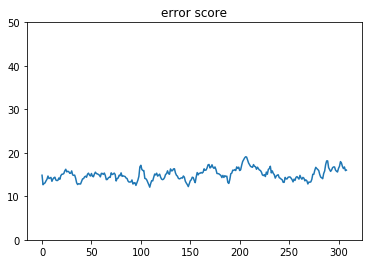

In [41]:
req = requests.post('http://localhost:5000/detect',json = Preprocess(file).jsdata)
errors = json.loads(req.content)["errors"]
plt.title('error score')
plt.ylim(0,50)
plt.plot(errors)

In [9]:
print(req)

<Response [200]>


In [15]:
errors = json.loads(req.content)["errors"]

[20.674251960583383,
 17.242982508614233,
 17.014305099980596,
 17.555779073143437,
 17.17812942431259,
 16.180326181227517,
 17.22433960984287,
 17.57151289576272,
 17.083194847792264,
 18.45325083780897,
 20.052925396041637,
 19.649524653148696,
 19.417035277122345,
 18.323842326245295,
 18.215509772345655,
 17.719896892455456,
 16.657352842157234,
 17.308328640126838,
 17.132278231408765,
 17.268381472014283,
 16.77012913754467,
 17.332848217358467,
 17.63540905206194,
 17.54674653919045,
 17.972610279868398,
 19.205898336991503,
 21.738863483320436,
 20.129407548033605,
 19.84528807301526,
 20.650063061832753,
 21.244502035212058,
 20.002386547507307,
 21.582708203370437,
 20.25798999079962,
 19.47202314244667,
 19.80444833800368,
 20.241969402661674,
 20.290584288725775,
 19.702746179069813,
 18.302218798495566,
 17.792157629127693,
 17.18825489053424,
 16.565237006495714,
 16.547365850727267,
 17.02843133100174,
 16.201688460965137,
 15.861660421157584,
 15.767929448906383,
 15.7

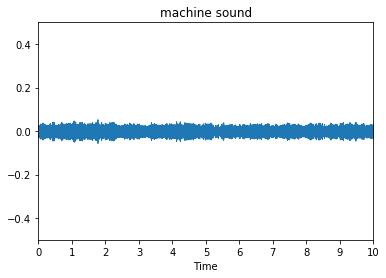

In [8]:
# sound 
filename = 'dev_data/train/normal_id_00_00000000.wav'
# sr 為採樣頻率
y, sr = librosa.load(filename,sr=22050)
# trim silent edges
sound, _ = librosa.effects.trim(y)
plt.title('machine sound')
plt.ylim(-0.5,0.5)
librosa.display.waveplot(sound, sr=sr);
plt.savefig('1.png')

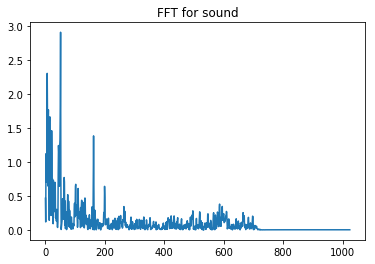

In [11]:
import numpy as np

n_fft = 2048
D = np.abs(librosa.stft(sound[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.title("FFT for sound")
plt.plot(D);
plt.savefig('2.png')

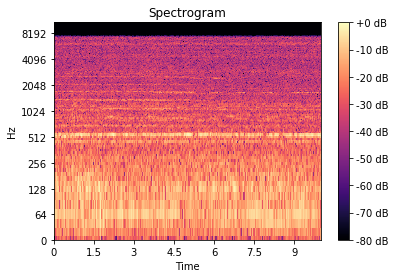

In [18]:
n_fft=1024
hop_length=512
D = np.abs(librosa.stft(sound, n_fft=n_fft,  hop_length=hop_length))
DB = librosa.amplitude_to_db(D, ref=np.max)
plt.title('Spectrogram')
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.savefig('3.png')

In [19]:
DB.shape

(513, 431)

In [1]:
 import common as com
 param = com.yaml_load()

In [5]:
import keras_model
model_file = 'model/model_ver1.hdf5'
model = keras_model.load_model(model_file)

Using TensorFlow backend.


In [26]:
file_path = r'dev_data\train\normal_id_00_00000021.wav'

In [46]:
file_path = r'dev_data\test\anomaly_id_00_00000010.wav'

In [47]:
# file_path = r'dev_data\train\normal_id_00_00000021.wav'
data = com.file_to_vector_array(file_path,
                                                n_mels=param["feature"]["n_mels"],
                                                frames=param["feature"]["frames"],
                                                n_fft=param["feature"]["n_fft"],
                                                hop_length=param["feature"]["hop_length"],
                                                power=param["feature"]["power"])


In [48]:
errors = np.mean(np.square(data - model.predict(data)), axis=1)

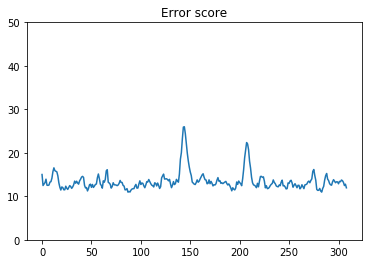

In [49]:
plt.title('Error score')
plt.ylim(0,50)
plt.plot(errors)
plt.savefig('pic/anomaly.png')

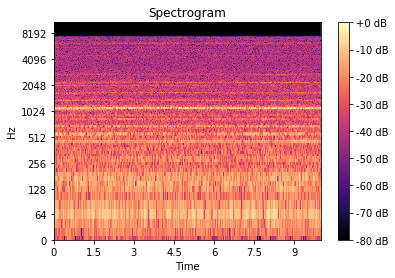

In [38]:
y, sr = librosa.load(file_path)
# trim silent edges
sound, _ = librosa.effects.trim(y)
n_fft=1024
hop_length=512
D = np.abs(librosa.stft(sound, n_fft=n_fft,  hop_length=hop_length))
DB = librosa.amplitude_to_db(D, ref=np.max)
plt.title('Spectrogram')
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.savefig('pic/1.png')

In [41]:
DB.shape

(513, 431)

In [ ]:
D = np.abs(librosa.stft(sound, n_fft=n_fft,  hop_length=hop_length))
DB = librosa.amplitude_to_db(D, ref=np.max)
plt.title('Spectrogram')
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
# plt.savefig('pic/1.png')